# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [21]:
import pandas as pd

def data_parser(file):
    df_csv = pd.read_csv(file) #converting csv to df
    df_csv = df_csv.drop(['DISTANCE','RAMP_TO_RAMP','AIR_TIME','DEST_STATE_NM','DEST_WAC','FREIGHT','PAYLOAD','DEST_STATE_FIPS','QUARTER','DEST_CITY_NAME','DEST_STATE_ABR','DEST_AIRPORT_SEQ_ID','REGION','MAIL','UNIQUE_CARRIER_ENTITY','UNIQUE_CARRIER_NAME','UNIQUE_CARRIER','DEST_CITY_MARKET_ID','DEST_AIRPORT_ID','ORIGIN_STATE_NM','DEST','DISTANCE_GROUP','CLASS','PASSENGERS','CARRIER','ORIGIN_AIRPORT_ID','ORIGIN','ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_MARKET_ID','ORIGIN_CITY_NAME','ORIGIN_WAC','ORIGIN_STATE_ABR','ORIGIN_STATE_FIPS','AIRCRAFT_TYPE','AIRCRAFT_CONFIG','AIRCRAFT_GROUP'],axis=1) #getting rid of irrelevant columns
    df_csv = df_csv[df_csv['DEPARTURES_SCHEDULED'] != 0.0] #clearing rows where no departures are scheduled
    df_csv = df_csv[df_csv['CARRIER_GROUP'] != 7] #carrier group 7 has no passengers according to download website
    df_csv = df_csv.sort_values(by='CARRIER_NAME') #sorting by the type of carrier
    df_csv = df_csv[df_csv['DEPARTURES_SCHEDULED'] > df_csv['DEPARTURES_PERFORMED']] #looking at where there were more flights scheduled than performed (when flights were cancelled)
    df_csv.reset_index(drop=True, inplace = True)
    df_csv.to_csv('transportation_statistics.csv', index=False) #writing to file

    return df_csv

############ Function Call ############
data_parser('/Users/sristikaramchandani/Desktop/GT/cs 2316/project data/dataset1.csv')

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,SEATS,AIRLINE_ID,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,YEAR,MONTH
0,24.0,23.0,184.0,21615,"Air Charter, Inc d/b/a Air Flamenco",1,6,2024,2
1,90.0,51.0,408.0,21615,"Air Charter, Inc d/b/a Air Flamenco",1,6,2024,3
2,90.0,77.0,616.0,21615,"Air Charter, Inc d/b/a Air Flamenco",1,6,2024,3
3,90.0,83.0,664.0,21615,"Air Charter, Inc d/b/a Air Flamenco",1,6,2024,3
4,40.0,24.0,192.0,21615,"Air Charter, Inc d/b/a Air Flamenco",1,6,2024,1
...,...,...,...,...,...,...,...,...,...
17637,3.0,2.0,8.0,20333,Wright Air Service,1,5,2024,2
17638,29.0,28.0,233.0,20333,Wright Air Service,1,5,2024,1
17639,52.0,51.0,427.0,20333,Wright Air Service,1,5,2024,2
17640,2.0,1.0,4.0,20333,Wright Air Service,1,5,2024,2


## Web Collection Requirement \#1


In [22]:
import json
import requests
import pandas as pd

def web_parser1(url):
    response = requests.get(url) #getting the data
    json_data = response.json()  #parsing json
    data = json_data['data'] #getting relevant data
    columns = [col['name'] for col in json_data['meta']['view']['columns']] #columns are in the 'meta.view.columns' field

    df_json = pd.DataFrame(data, columns=columns) #creating dataframe
    df_json = df_json.drop(['sid','id','position','created_at','created_meta','updated_at','updated_meta','meta','DataExtractDate','ReportPeriod'],axis=1) #dropping irrelevant/ unneccesary columns
    df_json = df_json[df_json['FlightType'] == 'Scheduled Carriers'] #because charter and commuter flights are uninteresting to us since we are focusing on commerical flights and passengers
    df_json = df_json.sort_values(by='Domestic_International') #we want to see the difference between how many passengers have been carried by dom and int planes so we can generalize results of how different load factors would impact airlines in the long run
    df_json = df_json.reset_index(drop = True)

    df_json.to_csv('dom_int_passenger_count.csv', index=False) #writing new df to file

    return df_json

############ Function Call ############
web_parser1('https://data.lacity.org/api/views/d3a2-7j6v/rows.json?accessType=DOWNLOAD')

,Arrival_Departure,Domestic_International,FlightType,Passenger_Count
0,Arrival,Domestic,Scheduled Carriers,1128607
1,Arrival,Domestic,Scheduled Carriers,1747732
2,Arrival,Domestic,Scheduled Carriers,2419169
3,Departure,Domestic,Scheduled Carriers,2400638
4,Arrival,Domestic,Scheduled Carriers,1918767
...,...,...,...,...
851,Departure,International,Scheduled Carriers,1055191
852,Departure,International,Scheduled Carriers,627113
853,Departure,International,Scheduled Carriers,707146
854,Arrival,International,Scheduled Carriers,638866


## Web Collection Requirement #2

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def web_parser2(url):
    #getting data and parsing through it
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table=soup.find('table',{'class':"wikitable"})
    #converting data to df
    df_wiki = pd.read_html(str(table))
    df_wiki = pd.DataFrame(df_wiki[0])
    df_wiki = df_wiki.drop(['Total assets in billion US$[b]','Price per share in US$ [citation needed]','Employees[b]','Refs.'], axis=1)
    df_wiki = df_wiki.dropna(axis=0) #dropping rows with NaNs
    df_wiki = df_wiki.reset_index(drop = True) #resetting indices
    df_wiki.rename(columns={'Net income in billion US$[b]':'Net Income in Billion USD','Revenue in billion US$[a][b]':'Revenue in Billion USD','Passenger load factor (%)[b]':'Passenger Load Factor (%)','Fleet size[c]':'Fleet Size'}, inplace=True) #renaming columns to make them more readable
    #correcting the non-standard dash and converting columns to float
    df_wiki['Net Income in Billion USD'] = df_wiki['Net Income in Billion USD'].str.replace('−', '-').astype(float)

    #calculating Net Profit Margin
    df_wiki['Net Profit Margin'] = abs(df_wiki['Net Income in Billion USD'] / df_wiki['Revenue in Billion USD']) * 100 

    df_wiki = df_wiki[df_wiki['Year'] != 2020] #removing the outlier for better correlation calculation
    
    df_wiki.to_csv('delta_air_lines_financials.csv', index=False) #writing to file

    return df_wiki

############ Function Call ############
web_parser2('https://en.m.wikipedia.org/wiki/Delta_Air_Lines#cite_note-Airline_group-100')

/var/folders/09/8qzkp6416kv_bcwtk4g4sqs80000gn/T/ipykernel_38949/3825752014.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_wiki = pd.read_html(str(table))


,Year,Revenue in Billion USD,Net Income in Billion USD,Passenger Load Factor (%),Fleet Size,Net Profit Margin
0,2009,28.0,-1.2,82.0,983.0,4.285714
1,2010,31.7,0.6,83.0,815.0,1.892744
2,2011,35.1,0.9,82.1,775.0,2.564103
3,2012,36.6,1.0,83.8,717.0,2.732240
4,2013,37.7,10.5,83.8,743.0,27.851459
5,2014,40.3,0.7,84.7,772.0,1.736973
6,2015,40.7,4.5,84.9,809.0,11.056511
7,2016,39.6,4.3,84.6,832.0,10.858586
8,2017,41.2,3.5,85.6,856.0,8.495146
9,2018,44.4,3.9,85.5,871.0,8.783784


In [24]:
def extra_source1(file1, file2, file3):
    df1 = pd.read_excel(file1, header=1, engine='openpyxl') #Load the file
    df1 = df1[df1['Month'] == 'TOTAL'] #Filter so the new data only shows the total load factor per year
    df1 = df1.drop(['Month'], axis = 1) #Drop the Month column

    df2 = pd.read_excel(file2, header=1, engine='openpyxl') #Load the file
    df2 = df2[df2['Quarter'] == 'TOTAL'] #Filter so the new data only shows the total net income per year
    df2 = df2.drop(['LATIN AMERICA', 'ATLANTIC', 'PACIFIC', 'Quarter'], axis = 1) #Drop the unnecessary columns

    df3 = pd.read_excel(file3, header=1, engine='openpyxl') #Load the file
    df3 = df3[df3['Quarter'] == 'TOTAL'] #Filter so the new data only shows the total operating revenue per year
    df3 = df3.drop(['LATIN AMERICA', 'ATLANTIC', 'PACIFIC', 'Quarter'], axis = 1) #Drop the unnecessary columns

    #Merge each data set by year
    merged_df = pd.merge(df1, df2, on='Year', how='outer', suffixes=(' Load Factor', ' Net Income'))

    df3 = df3.add_suffix(' Operating Revenue')
    df3.rename(columns={'Year Operating Revenue': 'Year'}, inplace=True)

    merged_df = pd.merge(merged_df, df3, on='Year', how='outer')

    #Drop rows with inconsistent data
    years_to_delete = [2000, 2001, 2002, 2024]
    indices_to_drop = merged_df[merged_df['Year'].isin(years_to_delete)].index
    merged_df = merged_df.drop(indices_to_drop)

    #Save as a new CSV file
    merged_df.to_csv('Revenue and Income VS Load Factor.csv', index=False)

    return merged_df

############ Function Call ############
fileA = '/Users/sristikaramchandani/Desktop/GT/cs 2316/project data/LoadFactor.xlsx'
fileB = '/Users/sristikaramchandani/Desktop/GT/cs 2316/project data/OperatingPL.xlsx'
fileC = '/Users/sristikaramchandani/Desktop/GT/cs 2316/project data/OperatingRev.xlsx'
extra_source1(fileA,fileB,fileC)

,Year,DOMESTIC Load Factor,INTERNATIONAL Load Factor,TOTAL Load Factor,DOMESTIC Net Income,INTERNATIONAL Net Income,TOTAL Net Income,DOMESTIC Operating Revenue,INTERNATIONAL Operating Revenue,TOTAL Operating Revenue
3,2003,72.68,74.84,73.59,-1469581.0,3543.0,-1715469.0,88870096.0,1793391.0,117768014.0
4,2004,74.46,77.81,75.89,-9906154.0,151897.0,-9104424.0,100902510.0,1990252.0,134660284.0
5,2005,77.16,78.67,77.82,-19747536.0,190916.0,-27219896.0,111858063.0,2884934.0,151544403.0
6,2006,79.11,78.61,78.88,9043659.0,138042.0,18186112.0,120906925.0,2887401.0,165531803.0
7,2007,79.87,79.13,79.53,2995875.0,190398.0,7691404.0,124502978.0,3330852.0,174696416.0
8,2008,79.74,77.54,78.69,-18173970.0,-221582.0,-23749834.0,129728330.0,3941471.0,186087333.0
9,2009,81.06,78.28,79.72,-2252074.0,169340.0,-2526277.0,109681017.0,3252719.0,155051198.0
10,2010,82.18,81.59,81.90,1176134.0,304122.0,3665995.0,119073502.0,4393008.0,174677395.0
11,2011,82.87,80.30,81.60,1440558.0,-15962.0,1392188.0,132822096.0,4510153.0,193040699.0
12,2012,83.36,81.69,82.53,2212176.0,-193468.0,363732.0,135830212.0,3976258.0,196105250.0


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FIM&QO_fu146_anzr=Nv4+Pn44vr45
*   Web Collection #1 Source: https://data.lacity.org/api/views/d3a2-7j6v/rows.json?accessType=DOWNLOAD
*   Web Collection #2 Source: https://en.m.wikipedia.org/wiki/Delta_Air_Lines#cite_note-Airline_group-100
*   Extra Source 1: https://www.transtats.bts.gov/Data_Elements.aspx?Qn6n=I
*   Extra Source 2: https://www.transtats.bts.gov/Data_Elements_Financial.aspx?Qn6n=J
*   Extra Source 3: https://www.transtats.bts.gov/Data_Elements_Financial.aspx?Qn6n=K



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [25]:
def insight1(file):
    df = pd.read_csv(file)
    int_loads_avg = df['INTERNATIONAL Load Factor'].mean().round(3)
    dom_loads_avg = df['DOMESTIC Load Factor'].mean().round(3)
    diff = int_loads_avg - dom_loads_avg
    percent = ((diff / dom_loads_avg) *100).round(3)
    statement= f"The average domestic load factor is {dom_loads_avg} and the average international load factor is {int_loads_avg}, "
    if diff > 0:
        statement += f"so the average international load factor is {percent} percent greater than the average domestic load factor."
    elif diff < 0:
        percent = abs(percent)
        statement += f"so the average international load factor is {percent} percent less than the average domestic load factor."
    elif diff == 0:
        statement += f"so the average international load factor is equal to the average domestic load factor."

    return statement

############ Function Call ############
insight1('Revenue and Income VS Load Factor.csv')

'The average domestic load factor is 80.396 and the average international load factor is 77.735, so the average international load factor is 3.31 percent less than the average domestic load factor.'

### Insight 1 Explanation

This insight uses government flight data to compare domestic and international load factors. Based on the findings of this dataset, since international flights have a lower average passenger load factor than domestic flights, they are slightly less efficient at maximizing their capacity and therefore have more room for improvement.

In [26]:
def insight2(file1, file2):
    df = pd.read_csv(file1)
    df['Passenger_Count'] = df['Passenger_Count'].astype(float) 
    df_dom = df[df['Domestic_International']=='Domestic']
    avg_dom_count = df_dom['Passenger_Count'].mean().round(3)
    df_int = df[df['Domestic_International']=='International']
    avg_int_count = df_int['Passenger_Count'].mean().round(3)

    df2 = pd.read_csv(file2)
    int_loads_avg = df2['INTERNATIONAL Load Factor'].mean().round()
    dom_loads_avg = df2['DOMESTIC Load Factor'].mean().round(3)

    dom_passengers_carried = avg_dom_count * (dom_loads_avg/100)
    dom_potential_pass = (avg_dom_count - dom_passengers_carried).astype(int)
    int_passengers_carried = avg_int_count * (int_loads_avg/100)
    int_potential_pass = (avg_int_count - int_passengers_carried).astype(int)

    statement = f"Over the lifespan of aircrafts, on average, there have been {dom_potential_pass} additional passengers that domestic flights have had the potential to carry, and {int_potential_pass} additional passengers that international flights have had the potential to carry."

    return statement

############ Function Call ############
insight2('dom_int_passenger_count.csv', 'Revenue and Income VS Load Factor.csv')

'Over the lifespan of aircrafts, on average, there have been 384701 additional passengers that domestic flights have had the potential to carry, and 165558 additional passengers that international flights have had the potential to carry.'

### Insight 2 Explanation

This insight takes the average number of passengers that could potentially be carried on a particular type of flight (domestic or international), then uses the passenger load factors to determine how many potential passengers on average that an airline is missing out on. (The passenger count counts the total number of passengers carried by a specific plane so this generalizes the load factor to a larger population), so over a long period of time, this insight shows how many passengers an aircraft had the capacity to carry but did not, and therefore suggests the loss of money on a large scale over time.

In [27]:
def insight3(file):
    df = pd.read_csv(file)
    #correlation is covariance/(std dev of x * std dev of y)
    #covariance is mean of diff between data and mean of one variable times diff between data and mean of the other

    #I first graphed this data with visualization 1 and noticed an obvious outlier in 2020, so I went back to the original dataframe and removed 2020 from the data.
    
    avg_profit_margin = df['Net Profit Margin'].mean()
    stddev_profit = (((df['Net Profit Margin'] - avg_profit_margin)**2).sum()/(df['Net Profit Margin'].count()-1))**0.5
    
    avg_load = df['Passenger Load Factor (%)'].mean()
    stddev_load = (((df['Passenger Load Factor (%)'] - avg_load)**2).sum()/(df['Passenger Load Factor (%)'].count()-1))**0.5

    cov =((df['Net Profit Margin'] - avg_profit_margin)*(df['Passenger Load Factor (%)'] - avg_load)).sum()/(df['Passenger Load Factor (%)'].count()-1)
    correlation = (cov/(stddev_profit * stddev_load)).round(3)
    statement = f"The correlation between net profit margin and passenger load factor is {correlation}."

    return statement
        
############ Function Call ############
insight3('delta_air_lines_financials.csv')

'The correlation between net profit margin and passenger load factor is 0.323.'

### Insight 3 Explanation

This insight shows the correlation between net profit margin and passenger load factor, and since the correlation is positive and closer to zero than one, this suggests a weak positive correlation, meaning that as passenger load factor increases, net profit margin also tends to increase, but this relationship is not that strong.

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
def insight4(file):
  df = pd.read_csv(file)
  df['DIFFERENCE'] = df['DEPARTURES_SCHEDULED'] - df['DEPARTURES_PERFORMED']
  result = df.groupby('CARRIER_NAME')['DIFFERENCE'].mean().reset_index()
  result = result.rename(columns={'DIFFERENCE': 'AVERAGE_DIFFERENCE'})
  result.to_csv('average_difference_by_carrier.csv', index=False)
  return result

############ Function Call ############
insight4('transportation_statistics.csv')

,CARRIER_NAME,AVERAGE_DIFFERENCE
0,"Air Charter, Inc d/b/a Air Flamenco",26.692308
1,Air Excursions LLC,3.388889
2,Air Wisconsin Airlines Corp,3.660550
3,Alaska Airlines Inc.,7.994895
4,Alaska Central Express,11.591398
5,American Airlines Inc.,1.892613
6,Boutique Air,6.636364
7,Breeze Aviation Group DBA Breeze,1.028571
8,Cape Air,1.484663
9,CommuteAir LLC dba CommuteAir,2.606061


### Insight 4 Explanation

The table shows the average difference between scheduled and performed departures by carrier which was used to asses the airlines' schedule adherence. Northern Air Cargo Inc. has the highest average difference of 10, indicating significant discrepancies. Alaska Central Express and Sterling Airways also have notable differences of 7.25 and 6.68, respectively. Most carriers have smaller average differences, around 1 to 2, suggesting better schedule adherence and higher operational efficiency.

In [29]:
def insight5(file1, file2):
  delta_df = pd.read_csv(file1)
  total_df = pd.read_csv(file2)

  agg_funcs = {
      'min': 'min',
      'max': 'max',
      'median': 'median',
      'Q1': lambda x: x.quantile(0.25),
      'Q3': lambda x: x.quantile(0.75),
      'IQR': lambda x: x.quantile(0.75) - x.quantile(0.25)
  }

  delta_stats = delta_df['Passenger Load Factor (%)'].agg(agg_funcs)


  total_stats = total_df['TOTAL Load Factor'].agg(agg_funcs)


  stats_df = pd.DataFrame({
      'Statistic': ['min', 'max', 'median', 'Q1', 'Q3', 'IQR'],
      'Delta Load Factor': delta_stats.values,
      'Total Load Factor': total_stats.values
  })
  stats_df.set_index('Statistic', inplace=True)
  stats_df.to_csv('load_factor_statistics.csv', index=True)

  return stats_df

############ Function Call ############
insight5('delta_air_lines_financials.csv', 'Revenue and Income VS Load Factor.csv')

,Delta Load Factor,Total Load Factor
Statistic,,
min,69.000,58.23
max,86.000,83.85
median,84.300,81.60
Q1,83.200,78.69
Q3,84.975,82.68
IQR,1.775,3.99


### Insight 5 Explanation
The summary statistics show that Delta Airlines generally has higher and more consistent load factor compared to the overall U.S. airline industry. Delta's minimum load factor is 55%, with a maximum of 86%, indicating a strong performance range. The median load factor for Delta is 84%, slightly higher than the industry median of 81.60%. Delta's narrower IQR of 2.40% suggests less variability and more consistent seat utilization compared to the industry's IQR of 3.99%. Overall, Delta maintains better operational efficiency with less fluctuation in performance.

## Data Visualizations

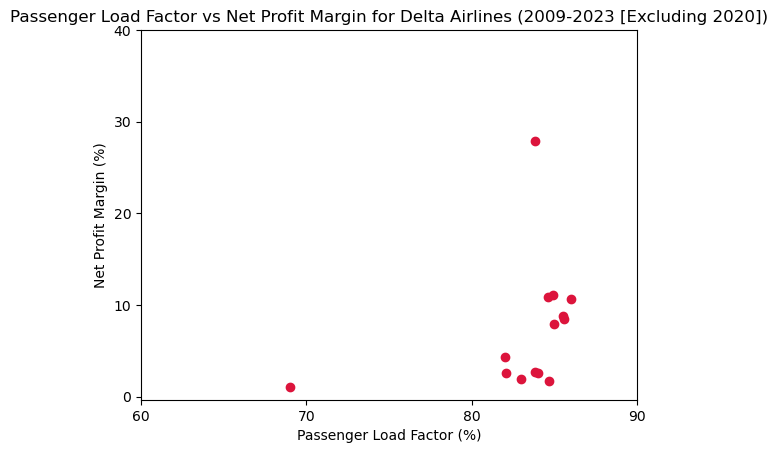

In [30]:
import matplotlib.pyplot as plt
import numpy as np
def visual1(file):
    df = pd.read_csv(file)
    x = df['Passenger Load Factor (%)']
    y = df['Net Profit Margin']
    #scatterplot of passenger load factor and net profit margin
    plt.scatter(x,y, color = 'crimson')
    plt.xlabel('Passenger Load Factor (%)')
    plt.xticks(np.arange(60,100,10))
    plt.yticks(np.arange(0,50,10))
    plt.ylabel('Net Profit Margin (%)')
    plt.title('Passenger Load Factor vs Net Profit Margin for Delta Airlines (2009-2023 [Excluding 2020])')
    plt.show()

############ Function Call ############
visual1('delta_air_lines_financials.csv')

### Visualization 1 Explanation

This scatterplot demonstrates the weak positive correlation between passenger load factor and net profit margin as calculated in insight 3. If a line of best fit were to be drawn on this data, the slope would be approximately 0.323.

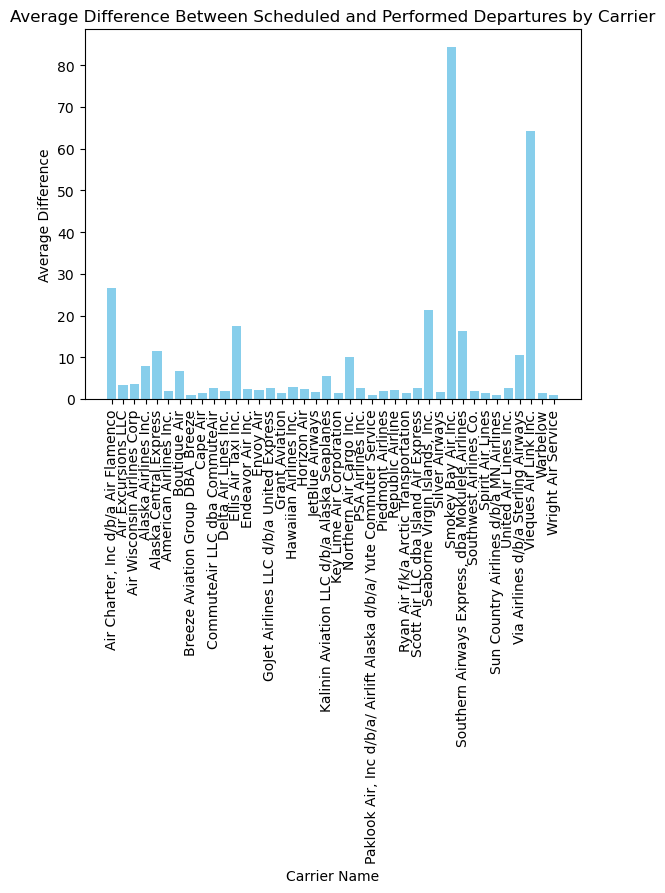

In [31]:
import matplotlib.pyplot as plt
import numpy as np
def visual2(data):

  result_df = pd.read_csv(data)

  plt.bar(result_df['CARRIER_NAME'], result_df['AVERAGE_DIFFERENCE'], color='skyblue')
  plt.xlabel('Carrier Name')
  plt.ylabel('Average Difference')
  plt.title('Average Difference Between Scheduled and Performed Departures by Carrier')
  plt.xticks(rotation=90)

  plt.show()

############ Function Call ############
visual2('average_difference_by_carrier.csv')

### Visualization 2 Explanation

The bar graph visually represents the average difference between scheduled and performed departures for various carriers, highlighting those with significant discrepancies. Northern Air Cargo Inc., Sterling Airways, and Alaska Central Express show the largest variances, indicating potential areas for improving scheduling accuracy. On the other hand, Delta Air Lines Inc., American Airlines Inc., and Southwest Airlines Co. exhibit minimal differences, suggesting effective scheduling practices and better operational performance.

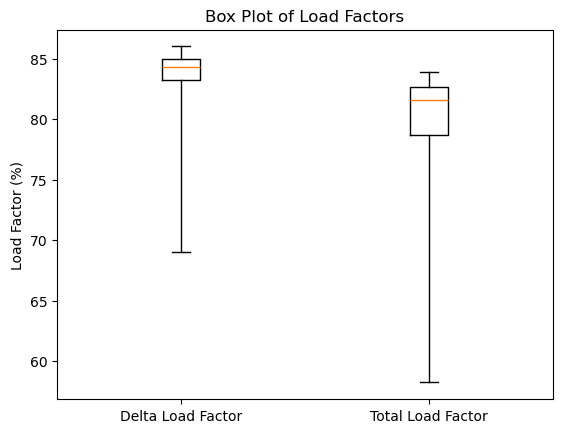

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def visual3(file):
  df = pd.read_csv(file)
  delta_stats = {
    'med': df[df['Statistic'] == 'median']['Delta Load Factor'].values[0],
    'q1': df[df['Statistic'] == 'Q1']['Delta Load Factor'].values[0],
    'q3': df[df['Statistic'] == 'Q3']['Delta Load Factor'].values[0],
    'whislo': df[df['Statistic'] == 'min']['Delta Load Factor'].values[0],
    'whishi': df[df['Statistic'] == 'max']['Delta Load Factor'].values[0]
  }

  total_stats = {
    'med': df[df['Statistic'] == 'median']['Total Load Factor'].values[0],
    'q1': df[df['Statistic'] == 'Q1']['Total Load Factor'].values[0],
    'q3': df[df['Statistic'] == 'Q3']['Total Load Factor'].values[0],
    'whislo': df[df['Statistic'] == 'min']['Total Load Factor'].values[0],
    'whishi': df[df['Statistic'] == 'max']['Total Load Factor'].values[0]
  }

  stats = [delta_stats, total_stats]

  _, ax = plt.subplots()
  ax.bxp(stats, showfliers=False)
  ax.set_xticklabels(['Delta Load Factor', 'Total Load Factor'])
  plt.title('Box Plot of Load Factors')
  plt.ylabel('Load Factor (%)')

  plt.show()
    
############ Function Call ############
visual3('load_factor_statistics.csv')

### Visualization 3 Explanation

The analysis shows that both Delta and Total Load Factors have medians close to 80%, indicating high and similar average seat utilization. Delta Airlines exhibits a wider range and greater variability in load factors compared to the industry average. Both distributions show negative skewness, with more values below the median, indicating occasional lower load factors. Despite the similar central tendencies and interquartile ranges, Delta's higher variability suggests more operational fluctuations. Overall, Delta maintains high seat occupancy but with more variability than the overall industry.

## Summary Files

In [33]:
def summary1(file1,file2):
    #this is the aggregate data we collected from insight 5 of the comparisons between delta load factors and total average load factors for airlines
    #this comparison shows delta's increased efficiency compared to other airlines and suggests they have done a better job at maximizing their passenger load factor, and therefore are better maximizing their revenue compared to other commercial airlines
    delta_df = pd.read_csv(file1)
    total_df = pd.read_csv(file2)

    agg_funcs = {
        'min': 'min',
        'max': 'max',
        'median': 'median',
        'Q1': lambda x: x.quantile(0.25),
        'Q3': lambda x: x.quantile(0.75),
        'IQR': lambda x: x.quantile(0.75) - x.quantile(0.25)
    }

    delta_stats = delta_df['Passenger Load Factor (%)'].agg(agg_funcs)

    total_stats = total_df['TOTAL Load Factor'].agg(agg_funcs)

    stats_df = pd.DataFrame({
        'Statistic': ['min', 'max', 'median', 'Q1', 'Q3', 'IQR'],
        'Delta Load Factor': delta_stats.values,
        'Total Load Factor': total_stats.values
    })
    stats_df.set_index('Statistic', inplace=True)
    stats_df.to_csv('summary_file.csv', index=True)
    return stats_df

############ Function Call ############
summary1('delta_air_lines_financials.csv', 'Revenue and Income VS Load Factor.csv')

,Delta Load Factor,Total Load Factor
Statistic,,
min,69.000,58.23
max,86.000,83.85
median,84.300,81.60
Q1,83.200,78.69
Q3,84.975,82.68
IQR,1.775,3.99


In [33]:
def summary1(file1,file2):

############ Function Call ############
summary1('delta_air_lines_financials.csv', 'Revenue and Income VS Load Factor.csv')

,Delta Load Factor,Total Load Factor
Statistic,,
min,69.000,58.23
max,86.000,83.85
median,84.300,81.60
Q1,83.200,78.69
Q3,84.975,82.68
IQR,1.775,3.99


# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:

*   Stack Overflow Assistance



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*  https://youtu.be/1hDSazDOUMM?feature=shared


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
